<a href="https://colab.research.google.com/github/N-tank/-/blob/main/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## シンプルなディープラーニング

### データの読み込み

In [2]:
import numpy as np
from sklearn import datasets

iris=datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [3]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler=preprocessing.StandardScaler()
scaler.fit(iris.data)
x=scaler.transform(iris.data)
print(x[:10])

t=np_utils.to_categorical(iris.target)
print(t[:10])



[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test =train_test_split(x,t,train_size=0.75)
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(112, 4)
(38, 4)
(112, 3)
(38, 3)


モデルの構築

In [5]:
from keras.models import  Sequential
from keras.layers import  Dense, Activation

model=Sequential()
model.add(Dense(32,input_dim=4))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(3))
model.add(Activation("softmax"))
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
______________________________________________________

学習

In [6]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.2002 - accuracy: 0.2857
Epoch 2/30
14/14 [==============================] - 0s 1ms/step - loss: 1.0416 - accuracy: 0.4018
Epoch 3/30
14/14 [==============================] - 0s 1ms/step - loss: 0.9381 - accuracy: 0.4554
Epoch 4/30
14/14 [==============================] - 0s 1ms/step - loss: 0.8589 - accuracy: 0.6964
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7962 - accuracy: 0.7857
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7425 - accuracy: 0.8214
Epoch 7/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.8304
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.8482
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.8482
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.8482
Epoch 11/30
14/14 [

学習の推移

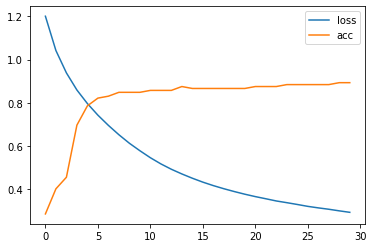

In [7]:
import matplotlib.pyplot as plt

hist_loss=history.history["loss"]
hist_acc=history.history["accuracy"]

plt.plot(np.arange(len(hist_loss)),hist_loss,label="loss")
plt.plot(np.arange(len(hist_acc)),hist_acc,label="acc")
plt.legend()
plt.show()


### 評価

In [8]:
loss,accuracy =model.evaluate(x_test, t_test)
print(loss,accuracy)


2/2 [==============================] - 0s 6ms/step - loss: 0.3514 - accuracy: 0.9211
0.3514275848865509 0.9210526347160339


### 予測

In [9]:
model.predict(x_test)

array([[7.81611502e-02, 4.73253518e-01, 4.48585361e-01],
       [8.80531073e-02, 7.31016994e-01, 1.80929869e-01],
       [9.42103446e-01, 4.04354520e-02, 1.74611602e-02],
       [1.11975677e-01, 3.95342290e-01, 4.92681950e-01],
       [9.63294327e-01, 2.17814539e-02, 1.49242198e-02],
       [9.58812237e-01, 2.33561769e-02, 1.78315546e-02],
       [7.40013346e-02, 1.97160393e-01, 7.28838265e-01],
       [9.32894111e-01, 4.04784195e-02, 2.66274437e-02],
       [9.68664765e-01, 1.81198306e-02, 1.32154273e-02],
       [4.24129255e-02, 2.28405207e-01, 7.29181886e-01],
       [9.68238115e-01, 1.77903492e-02, 1.39715113e-02],
       [4.40336764e-04, 6.31687269e-02, 9.36390996e-01],
       [1.45153955e-01, 2.63026953e-01, 5.91819108e-01],
       [7.21104667e-02, 7.26514339e-01, 2.01375172e-01],
       [9.48099375e-01, 3.48410346e-02, 1.70595404e-02],
       [1.58024594e-01, 6.61536932e-01, 1.80438474e-01],
       [7.38952532e-02, 4.76708025e-01, 4.49396819e-01],
       [9.36933160e-01, 4.61951

### モデルの保存

In [10]:
from keras.models import  load_model

model.save("model.h5")
load_model("model.h5")